# この課題の目的
・コーディング力を向上させる  
・スクラッチを通してロジスティック回帰を理解する  
・分類問題について基礎を学ぶ  

In [1]:
#データの取り込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split

%matplotlib inline

In [2]:
# Irisデータセットの用意
iris = pd.read_csv("/Users/tsuneo/kaggle/IrisSpecies/Iris.csv")

In [3]:
# 型の確認
iris.shape

(150, 6)

In [4]:
iris.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [5]:
#  目的変数Speciesの中から2つに限定する
iris = iris.query('Species in ["Iris-versicolor", "Iris-virginica"]')

In [6]:
iris.shape

(100, 6)

In [7]:
# irisのデータを説明変数、目的変数に分割する
X = iris[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = iris[["Species"]]
print(type(y))
y["Species"] = y["Species"].map({'Iris-versicolor':0, 'Iris-virginica':1})[:,None]
print(type(y))
X.shape, y.shape

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


/Users/tsuneo/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


((100, 4), (100, 1))

In [8]:
# Iris-versicolorとIris-virginicaの割合が偏らないようにする
# すいません、sklearnに頼りました
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y["Species"])
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 4), (20, 4), (80, 1), (20, 1))

In [9]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# ロジスティック回帰のクラスを作成する

## シグモイド関数を実装する。

In [10]:
def sigmoid_func(z):
    return 1/(1+np.exp(-z))

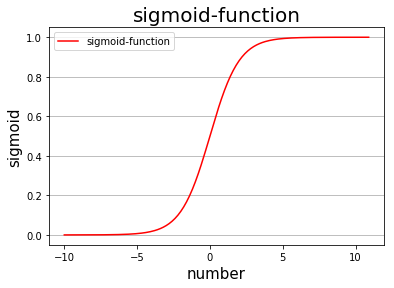

In [11]:
x = np.arange(-10, 11, 0.1)
y = sigmoid_func(x)
plt.plot(x, y, "r", label="sigmoid-function")
plt.xlabel("number", fontsize=15)
plt.ylabel("sigmoid", fontsize=15)
plt.title("sigmoid-function", fontsize=20)
ax = plt.gca()
ax.yaxis.grid(True)
plt.legend()
plt.show()

## ロジスティック回帰class

In [24]:
import matplotlib.pyplot as plt

class ScratchLogisticRegression:
    
    # コンストラクタ
    def __init__(self, λ, lr, iteration):
        self.λ = λ                                            # 正則化パラメータ
        self.lr = lr                                            # 学習率
        self.iteration = iteration                   # イテレーション回数
        self.theta = np.random.rand(4,1)  # 重みパラメータ 
        
     #シグモイド関数
    def _sigmoid_func(self, z):
        return 1/(1+np.exp(-z))
    
    # 仮定関数（X：N行×4列、theta：4行×1列　＝　N行×1列）
    def _assumed_func(self, X_train):
        return np.dot(X_train, self.theta)
    
    # 目的関数（損失関数）を実装する （戻り値はスカラー値）
    def _logistic_reg_func(self, X_train, y_train):
        m = len(X_train)                              # 入力されるデータ数
        z = self._assumed_func(X_train) # 入力総和（ベクトル）
        h = self._sigmoid_func(z)               # 仮定関数（ベクトル）
        return (1/m)*np.sum(-y*np.log(h) - (1- y)*np.log(1 - h)) + (self.λ/2*m)*np.sum(self.theta**2)
    
    # 勾配降下法で重みを更新する
    def _gradient_decent(self, X_train, y_train):
        m = len(X_train)
        self.theta = np.random.rand(4,1)
        for i in range(self.iteration):
            # 仮定関数（予測値）と教師データとの差分を取得し、転置する
            A = (self._assumed_func(X_train) - y_train).T
    
            # 重みを更新する
            self.theta =  self.theta -  self.lr*((1/m)*np.sum(np.dot(A, X_train))) + (self.λ/m)*self.theta
    
            #　損失値を取得する
            cost = self._logistic_reg_func(X_train, y_train)
             
            # 格納していく
            self.theta_list.append(self.theta)
            self.cost_list.append(cost)
    
    # 学習
    def fit(self, X_train, y_train):
        cost = []
        self.cost_list = []
        self.theta_list = []
        self._gradient_decent(X_train, y_train)
    
    # 確率を予測
    def predict_proba(self, X_test):
        return self._assumed_func(X_test)
    
    # 推定したラベルを出力
    def predict_label(self, X_test):
        proba = self.predict_proba(X_test)
        for i, proba_to_flag in enumerate(proba):
            if proba_to_flag >0.5:
                proba[i, -1] = 1
                proba = proba.astype(np.int)
            else:
                proba[i, -1] = 0
                proba = proba.astype(np.int)
        return proba
    
    # 描画
    def visualize_graph(self):
        plt.plot(self.cost_list, "r", label="data")
        plt.xlabel("iteration", fontsize=15)
        plt.ylabel("loss", fontsize=15)
        plt.title("Learning curve", fontsize=20)
        plt.legend()
        plt.show()

In [25]:
#学習してみる
slr = ScratchLogisticRegression(λ=0.00001, lr=0.000001, iteration=30000)
slr.fit(X_train, y_train)

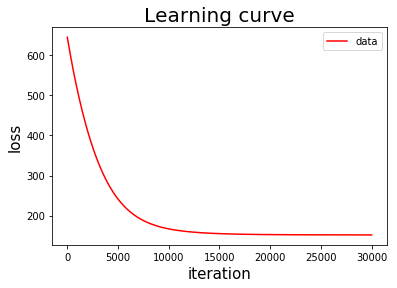

In [26]:
# 描画してみる
slr.visualize_graph()

In [27]:
#予測したラベル（０、１）を出力してみる
slr.predict_label(X_test)

array([[1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0]])

In [28]:
y_test

array([[0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1]])

In [29]:
#学習した重みを保存する
import pickle
filename = 'finalized_model.pkl'
pickle.dump(slr, open(filename, 'wb'))

In [30]:
! ls

AIF_sprint2-linear-regression.ipynb     finalized_model.pkl
AIF_sprint2-linear-regression_OLD.ipynb ml-scratch
AIF_sprint3-logistic-regression.ipynb   sprint1
IMG_0390.JPG                            sprint2
Untitled.ipynb


In [31]:
# 保存したモデルをロードする
import pickle
filename = 'finalized_model.pkl'
loaded_model = pickle.load(open(filename, 'rb'))

In [32]:
loaded_model.predict_label(X_test)

array([[1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0]])

In [33]:
# sklearnの混同行列を使い、評価して見る
#  なぜか、TPとTNをみて、全然当たっていない。。。
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, slr.predict_label(X_test))

array([[3, 7],
       [6, 4]])

# 説明

**ロジスティック回帰とは**  
線形分離問題と二値分類問題に使われるアルゴリズムです。名前には「回帰」とついていますが、分類問題を扱います。  
ラベルの値が2種類しかないような教師あり訓練データに適用されます。ラベルの値は０または１だとします。与えられた特徴量のサンプルxに対して、ラベルyが1になる確率をPで表し、yが0になる確率をPで表します。
$P(Y = 1| X = x) = σ(w_0 + \sum_{j=1}^d x_jw_j) = σ(w^tx^t)$　・・・式1

ここで、σはシグモイド関数と呼ばれるもので
$σ(ζ)　= 1/(1 + exp(-ζ))$
で定義されます。

式１でσの中を見ると、xについての線形関数となっています。ここでのアイディアは、サンプルxがラベル1に属するかという確からしさは線形関数の値が大きいほど大きくなるという仮定ですが、単純に線形関数の値を考えるとその値は-∞から+∞までの値をとります。


**交差エントロピー誤差関数とは**  
損失関数に分類される関数です。ロジスティック回帰で使用される目的関数（損失関数）です。ちなみに、今回のSPRINT2の線形回帰では２乗和誤差関数（MSE）を使用しました。


**シグモイド関数とは**  
$y = 1/(1 + e^{-x})$で表される関数です。  
ロジスティック（logistic）関数と呼ばれることもある。機械学習では活性化関数として利用されます。yの値が0< y < 1の範囲となるため、確率を表すことができる。xが０の時に0.5となる。


**正則化とは**  
機械学習で過学習を防ぐ。正則化はモデル（仮定関数）のパラメータの学習に使われます。汎化能力を高めるために使われます。L1正則化とL2正則化があるが、今回のSPRINTはL2正則化の方で行った。

過学習が発生しているモデルは、「バリアンスが高い」（high variance）とも表現される。その原因はパラメータの数が多すぎるため。データに対してモデルが複雑すぎることが考えられる。同様に、モデルは学習不足（underfitting）に陥ることもある。つまり、トレーニングデータセットのパターンをうまく捕捉するにはモデルの複雑さが十分ではなく、未知のデータに対する性能が低いことを意味する。このようなモデルは「バイアスが高い」（high bias）とも呼ばれる。



# 平均二乗誤差と交差エントロピー誤差
ロジスティック回帰では、平均二乗誤差ではなく交差エントロピー誤差を使う理由を説明せよ。

**損失関数を$L(t,f(w,x))$とする**

**線形回帰の平均二乗誤差**  
$L(t,f(w,x)) = \sum_{j=1}(t_i - f(w, x_i))^2$  
正解$t$と関数の出力$f(w,x)$が近くなるようにする
  

**ロジスティック回帰の交差エントロピー誤差**  
$L(t,f(w,x)) = -\sum_{j=1}t_i log(f(w, x_i))$  
正解$t_i$と出力$f(w_i,x_i)$をそれぞれ確率分布とみなして、確率分布に近づける。


線形回帰は、正解ラベルと予測値との差分を引き算で計算できた。しかし、ロジスティック回帰は確率を求めるモデルのため、単純に引き算で誤差を計算してはいけない。そのため、線形とロジスティックでは行っていることが異なるので、棲み分けしている。